

# Notes on `TPOT`

* `tpot` is a sklearn model that knows how to use other sklearn models.  It is similar to sklearn models because it has training data and training features.  The evaluations differ because of different parameters.
* `tpot` is also a generic model.  Training data and testing data is very important for `tpot`.  Randomness removes functional purity.0

* What does it mean if a model is fittwice?

In [21]:
from toolz import *; from jinja2 import Template;
from mistune import markdown; from pandas import DataFrame;
from tpot import TPOT, prepare_dataframe;
from sklearn.datasets import load_digits
digits = load_digits()
df = DataFrame(digits.data)
df['species'] = digits.target
# df = iris.flowers
import networkx as nx
import networkx
from deap.gp import graph, Terminal
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
template = Template(markdown("""#### The highest score is {{high}}

##### fit errors `{{len(fit)}}` vs. score errors `{{len(score)}}` of `{{total}}` executions

```
{{current}}
```"""))
template = partial(template.render, len=len)

In [23]:
from bokeh.sampledata import iris

In [58]:
%matplotlib inline

In [73]:
from IPython import display
from ipywidgets import HTML
template = Template(markdown("""#### The highest score is {{high}}

##### fit errors `{{len(fit)}}` vs. score errors `{{len(score)}}` of `{{total}}` executions

```
{{current}}
```"""))
template = partial(template.render, len=len)
class MYTPOT(TPOT):
    p = None
    current = HTML("""""")
    high_score, last_score = [0.]*2
    ct =0
    def evaluate(self, individual, data_source):
        self.high_score = max(self.last_score, self.high_score)
        self.ct += 1
        self.current.value = template(
            high = self.high_score,
            fit = self.fit_error,
            total = self.ct, 
            score = self.score_error,
            current = individual.__str__(),
        )
        
        nodes, edges, labels = graph(individual)
        display.clear_output(wait=True)
        g = nx.Graph()
        g.add_nodes_from(nodes)
        g.add_edges_from(edges)
        layout = nx.nx_pydot.graphviz_layout(g, prog="dot")
        globals()['ax'] = nx.draw_networkx_nodes(g, layout)
        nx.draw_networkx_edges(g, layout)
        nx.draw_networkx_labels(g, layout, labels)

#         g = networkx.DiGraph(self.history.genealogy_tree)
#         g = g.reverse()     # Make the grah top-down
#         networkx.draw(g)
        
        display.display(plt.show())
        
        return super().evaluate(individual, data_source)

In [74]:
tpot = MYTPOT(population=40,generations=10)
tpot.current

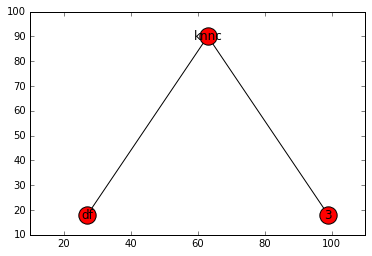

None

10 	39    	0            	0.808592     	0.988914     


MYTPOT(class_column='species', crossover_rate=0.05, generations=10, models=[],
    mutation_rate=0.9, population=40, random_state=0)

In [75]:
tpot = MYTPOT(population=40,generations=10)
tpot.current
tpot.fit(prepare_dataframe(df))

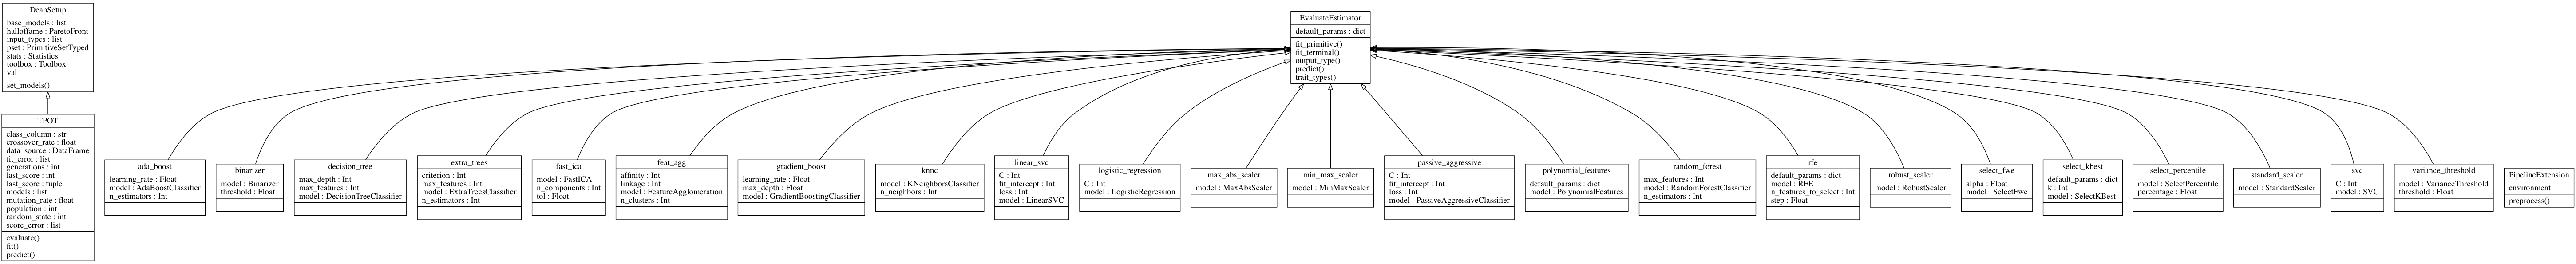

In [7]:
Image('classes_tpot.png')

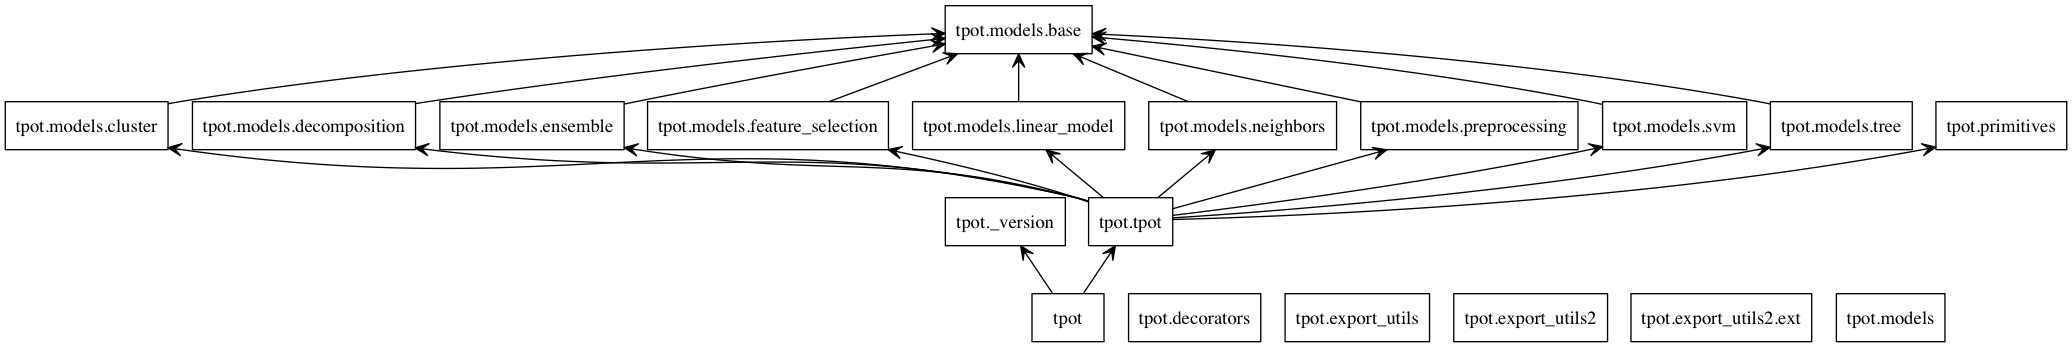

In [8]:
Image('packages_tpot.png')